# Multivate linear Regression from scatch

  step 1 --> Inizialize the parameter w and b

step 2 --> Froward_prop

step 3 --> cost_function

step 4 --> back_prop

step 5 --> Update_parameter

step 6 --> Model

In [98]:
# import libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline

In [99]:
# step 1
def inizialize_parameter(n):
    w = np.random.randn(1,n)
    b = 0
    return(w,b)

In [100]:
# step 2
def forward_prop(x,w,b):
    z = np.dot(w,x) + b
    return(z)

In [101]:
# step 3 
def cost_function(z,y):
    m = y.shape[1]
    c  = 1/m * np.sum(np.square(z - y))
    return(c)

In [102]:
# step 4
def back_prop(x,y,z):
    m = y.shape[1]
    dz = 1/m * (z - y)
    dw = np.dot(dz,x.T)
    db = np.sum(dz)
    return(dw,db)

In [103]:
def update_parameter(w,b,dw,db,learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return(w,b)

In [119]:
def linear_model(x_train,y_train,x_val,y_val,learning_rate,epoche):
    n = x_train.shape[0]
    w,b = inizialize_parameter(n) 
    
    cost_train = []
    m_train = y_train.shape[1]
    m_val = y_val.shape[1]
    
    for i in range(1,epoche + 1):
        z_train = forward_prop(x_train,w,b)
        cost = cost_function(z_train,y_train)
        dw,db = back_prop(x_train,y_train,z_train)
        w,b = update_parameter(w,b,dw,db,learning_rate)
        
        # store cost in the list for plotting purpose
        if i % 10 == 0:
            cost_train.append(cost)
        # mae train
        MAE_train = 1/m_train * np.sum(np.abs(z_train - y_train))
        
        # on validation 
        z_val = forward_prop(x_val,w,b)
        cost_val = cost_function(z_val,y_val)
        mae_val = 1/m_val * np.sum(np.abs(z_val - y_val))
        
        print('Epoche ' + str(i) + '/' + str(epoche) + ': ')
        print('Training cost:' + str(cost) + '|' + 'validation cost:' + str(cost_val))
        print('Training MAE :' + str(MAE_train) + '|' + 'validation MAE:' + str(mae_val))
        
    plt.plot(cost_train)
    plt.xlabel("Itreration(per tens)")
    plt.ylabel("Training cost:")
    plt.title("Learning Rate:" + str(learning_rate))
    plt.show()     

# Applying Mutivate Linear regression on Boston Dataset

In [14]:
pwd

'C:\\Users\\Virender Pal Singh'

In [67]:
data = pd.read_csv("train.csv")
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [68]:
data = data.drop(["ID"],axis = 1)
features = data.columns
features = features[:len(features)-1]
features

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

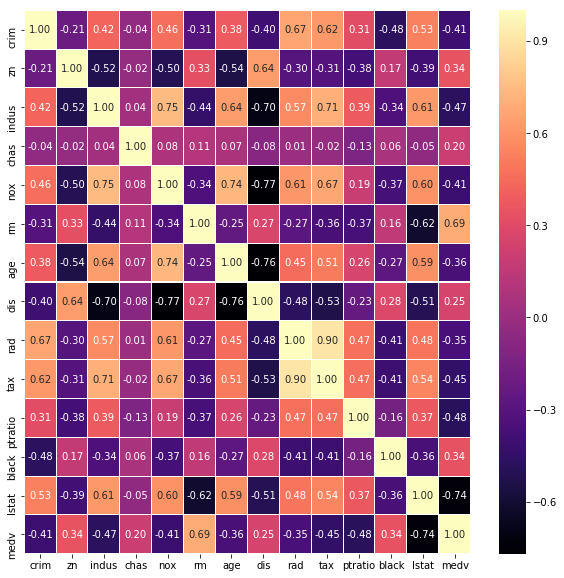

In [69]:
# Correlation between All Columns

fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [70]:
# Normalizing the data
y = data["medv"]
x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled)
x = data.drop([13],axis = 1)
x.columns = features
x.head()
#x_train , x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000000,0.180,0.058148,0.0,0.314815,0.583656,0.629787,0.308996,0.000000,0.206501,0.313953,1.000000,0.089680
1,0.000285,0.000,0.234444,0.0,0.172840,0.553834,0.775532,0.400545,0.043478,0.103250,0.604651,1.000000,0.204470
2,0.000354,0.000,0.053333,0.0,0.150206,0.665569,0.423404,0.514848,0.086957,0.065010,0.709302,0.994230,0.033389
3,0.000853,0.000,0.053333,0.0,0.150206,0.694423,0.512766,0.514848,0.086957,0.065010,0.709302,1.000000,0.099338
4,0.001115,0.125,0.264074,0.0,0.286008,0.474632,0.644681,0.462482,0.173913,0.235182,0.302326,0.996695,0.295254


In [71]:
# splitting data
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [72]:
x_train.shape

(266, 13)

In [73]:
y_train.shape

(266,)

In [76]:
x_train = x_train.T
x_train.shape

(13, 266)

In [77]:
x_test.shape

(67, 13)

In [78]:
x_test = x_test.T

In [79]:
y_train = np.array([y_train])

In [80]:
y_train.shape


(1, 266)

In [82]:
y_test = np.array([y_test])

Epoche 1/500: 
Training cost:677.6173699594702|validation cost:233.41739668860504
Training MAE :24.416951758448803|validation MAE:13.211254574186928
Epoche 2/500: 
Training cost:290.34416183707856|validation cost:170.93372010850925
Training MAE :14.413140465850303|validation MAE:9.916154203604318
Epoche 3/500: 
Training cost:155.05283957770007|validation cost:95.2312831928746
Training MAE :9.51974693249474|validation MAE:7.348397319608435
Epoche 4/500: 
Training cost:104.61187863276334|validation cost:89.87010260544105
Training MAE :8.289023732322542|validation MAE:6.125225361691197
Epoche 5/500: 
Training cost:83.51834024794833|validation cost:73.12632592274372
Training MAE :6.397805431294552|validation MAE:5.766308664274468
Epoche 6/500: 
Training cost:73.1322543873669|validation cost:70.51612501721418
Training MAE :6.475169125556419|validation MAE:5.151718588940559
Epoche 7/500: 
Training cost:67.04308775810462|validation cost:64.84821979266822
Training MAE :5.715147134330313|valida

Training cost:24.086121995841793|validation cost:23.09588591158455
Training MAE :3.376909060859775|validation MAE:3.1019098140296095
Epoche 237/500: 
Training cost:24.076331771783764|validation cost:23.086457575396366
Training MAE :3.3763295535046094|validation MAE:3.1019257407103242
Epoche 238/500: 
Training cost:24.06663434191973|validation cost:23.077166900123864
Training MAE :3.375753396717672|validation MAE:3.101941060573671
Epoche 239/500: 
Training cost:24.05702828932602|validation cost:23.068011817371858
Training MAE :3.375180562187018|validation MAE:3.1019557772206854
Epoche 240/500: 
Training cost:24.047512224950633|validation cost:23.058990294786074
Training MAE :3.3746110218835934|validation MAE:3.1019698944055314
Epoche 241/500: 
Training cost:24.03808478700011|validation cost:23.0501003353573
Training MAE :3.3740447480585742|validation MAE:3.101983416029154
Epoche 242/500: 
Training cost:24.028744640340744|validation cost:23.04133997674003
Training MAE :3.3734817132407016

Training cost:23.280948174406067|validation cost:22.555088702415315
Training MAE :3.3456190969355397|validation MAE:3.104532931420699
Epoche 368/500: 
Training cost:23.277051826239134|validation cost:22.55402786955383
Training MAE :3.3455516286414704|validation MAE:3.104675304654827
Epoche 369/500: 
Training cost:23.273176694074632|validation cost:22.552992201942782
Training MAE :3.345484145538537|validation MAE:3.10481707672718
Epoche 370/500: 
Training cost:23.269322611842824|validation cost:22.55198142013546
Training MAE :3.345416649764051|validation MAE:3.1049582542442367
Epoche 371/500: 
Training cost:23.265489415529636|validation cost:22.550995248266815
Training MAE :3.345349143421924|validation MAE:3.1050988437461253
Epoche 372/500: 
Training cost:23.261676943141506|validation cost:22.550033413998023
Training MAE :3.3452816285831584|validation MAE:3.105238851706998
Epoche 373/500: 
Training cost:23.257885034670984|validation cost:22.549095648461996
Training MAE :3.34521410728634

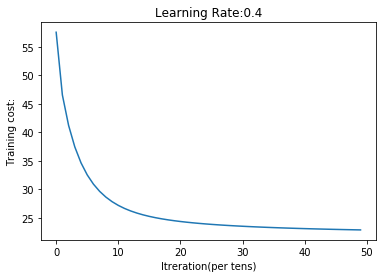

In [120]:
linear_model(x_train,y_train,x_test,y_test,0.4,500)